<a href="https://colab.research.google.com/github/JyothsnaGH/PythonforFinance/blob/main/FinancialDataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
# !pip install pandas-datareader

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
plt.style.use('fivethirtyeight')
import datetime

from pandas_datareader import data as pdr
import yfinance as yf
# yf.pdr_override()

In [45]:
import yfinance as yf

end_date = datetime.date.today().strftime('%Y-%m-%d')
apple = yf.Ticker("AAPL")
AAPL = apple.history(start = "2020-01-01", end= end_date)
AAPL.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-01-02 00:00:00-05:00,71.721004,72.776583,71.466797,72.716057,135480400,0.0,0.0
2020-01-03 00:00:00-05:00,71.941336,72.771752,71.783969,72.009125,146322800,0.0,0.0
2020-01-06 00:00:00-05:00,71.127858,72.621639,70.876068,72.582901,118387200,0.0,0.0
2020-01-07 00:00:00-05:00,72.592594,72.849224,72.021231,72.241547,108872000,0.0,0.0
2020-01-08 00:00:00-05:00,71.943744,73.706264,71.943744,73.403633,132079200,0.0,0.0


## Get the Balance Sheet and Income Statements

In [46]:
balance_sheet = apple.balance_sheet
print("Balance Sheet:")
print(balance_sheet.head())

income_statement = apple.financials
print("\nIncome Statement:")
print(income_statement.head())

# Information about Apple:
info = apple.info
print(f"\nCompany: {info['longName']}")
print(f"Sector: {info['sector']}")
print(f"Industry: {info['industry']}")
print(f"Market Cap: {info['marketCap']}")
print(f"P/E Ratio: {info['trailingPE']}")

# dividend data
dividends = apple.dividends
print("Dividends:")
print(dividends.tail())

Balance Sheet:
                            2024-09-30      2023-09-30      2022-09-30  \
Treasury Shares Number             NaN             0.0             NaN   
Ordinary Shares Number   15116786000.0   15550061000.0   15943425000.0   
Share Issued             15116786000.0   15550061000.0   15943425000.0   
Net Debt                 76686000000.0   81123000000.0   96423000000.0   
Total Debt              106629000000.0  111088000000.0  132480000000.0   

                            2021-09-30 2020-09-30  
Treasury Shares Number             NaN        NaN  
Ordinary Shares Number   16426786000.0        NaN  
Share Issued             16426786000.0        NaN  
Net Debt                 89779000000.0        NaN  
Total Debt              136522000000.0        NaN  

Income Statement:
                                                        2024-09-30  \
Tax Effect Of Unusual Items                                    0.0   
Tax Rate For Calcs                                           0.241   

In [47]:
apple = yf.Ticker("AAPL")

tickers = ["SPY", "AAL", "ZM", "NFLX", "META", 'AAPL']

end_date = datetime.date.today().strftime('%Y-%m-%d')
apple = yf.Ticker("AAPL")
AAPL = apple.history(start = "2020-01-01", end= end_date)

for ticker in tickers:
    globals()[ticker] = yf.Ticker(ticker)
    globals()[ticker] = globals()[ticker].history(start = "2020-01-01", end= end_date)

In [48]:
print(META.Close.mean())
META.describe()

313.3614368774882


,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,1305.000000,1305.000000,1305.000000,1305.000000,1.305000e+03,1305.000000,1305.0
mean,313.197875,317.615780,308.933862,313.361437,2.288489e+07,0.001533,0.0
std,139.978245,141.290310,138.244645,139.857361,1.552521e+07,0.027650,0.0
min,89.737209,90.115760,87.754781,88.571663,4.726100e+06,0.000000,0.0
25%,209.649155,212.677601,207.298135,210.326569,1.435890e+07,0.000000,0.0
50%,285.041182,289.394537,280.129944,285.887939,1.925070e+07,0.000000,0.0
75%,357.932681,360.522845,354.007694,357.295166,2.669320e+07,0.000000,0.0
max,736.000000,740.909973,725.619995,736.669983,2.323166e+08,0.500000,0.0


## Now, let us keep only the closing prices for our analysis.

In [49]:
## keep only column close for all tickers
for ticker in tickers:
    globals()[ticker] = globals()[ticker].Close

SPY

,Close
Date,
2020-01-02 00:00:00-05:00,301.194916
2020-01-03 00:00:00-05:00,298.914124
2020-01-06 00:00:00-05:00,300.054535
2020-01-07 00:00:00-05:00,299.210938
2020-01-08 00:00:00-05:00,300.805573
...,...
2025-03-06 00:00:00-05:00,572.710022
2025-03-07 00:00:00-05:00,575.919983
2025-03-10 00:00:00-04:00,560.580017


In [50]:
df = pd.DataFrame({'Market': SPY, 'AAPL':AAPL, 'AAL':AAL, 'NFLX':NFLX, 'META':META,'ZM':ZM})
df.tail()

,Market,AAPL,AAL,NFLX,META,ZM
Date,,,,,,
2025-03-06 00:00:00-05:00,572.710022,235.330002,13.25,906.359985,627.929993,75.480003
2025-03-07 00:00:00-05:00,575.919983,239.070007,13.03,891.109985,625.659973,75.980003
2025-03-10 00:00:00-04:00,560.580017,227.479996,12.50,866.679993,597.989990,73.470001
2025-03-11 00:00:00-04:00,555.919983,220.839996,11.46,895.099976,605.710022,73.150002
2025-03-12 00:00:00-04:00,558.869995,216.979996,10.93,919.679993,619.559998,73.949997


In [51]:
# print(AAPL)
# print(AAPL.shift(1))

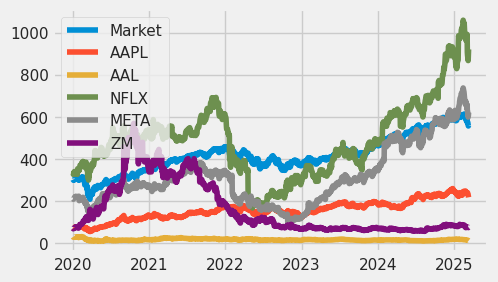

In [52]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(5, 3))
plt.plot(df, label=df.columns)
plt.legend(loc='upper left')
plt.show()

## For financial analysis, we require the log returns (daily), rather than the raw stock prices. The formula for log returns is:

log(Today's Price/yesterday's price - 1)

In [53]:
# create new columns that are log returns of the columns
data = np.log(df/df.shift(1))
# data = (df-df.shift(1))/df.shift(1)
# replace first row with zeroes
data.iloc[0] = 0
data.head(5)

,Market,AAPL,AAL,NFLX,META,ZM
Date,,,,,,
2020-01-02 00:00:00-05:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-03 00:00:00-05:00,-0.007601,-0.009769,-0.050769,-0.011926,-0.005305,-0.021177
2020-01-06 00:00:00-05:00,0.003808,0.007937,-0.012007,0.030014,0.018658,0.044193
2020-01-07 00:00:00-05:00,-0.002815,-0.004714,-0.003667,-0.015242,0.002161,0.022220
2020-01-08 00:00:00-05:00,0.005315,0.015958,0.022522,0.025404,0.010087,0.009000


## Find the betas of the stocks. The formula is shown below:

In [54]:
beta_aapl = (data[['Market','AAPL']].cov()/data['Market'].var()).iloc[0].iloc[1]
beta_aapl

1.1836818248667782

### Calculate beta using regression line.

In [55]:
beta, alpha = np.polyfit(data['Market'], data['AAPL'], 1)
alpha
beta

1.1836818248667766

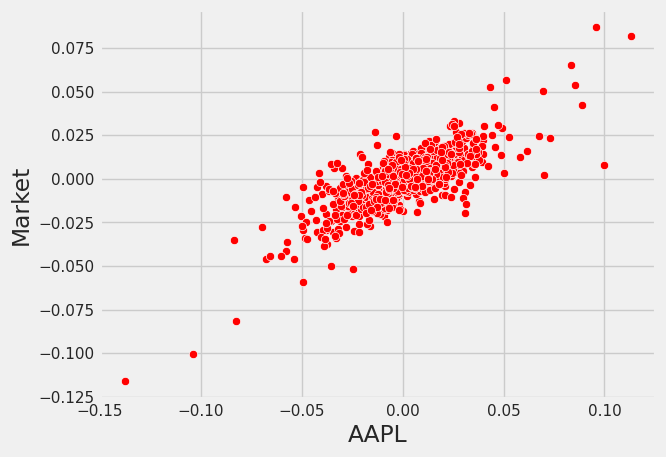

In [56]:
# plt.axvline(0, color='grey', alpha = 0.5)
# plt.axhline(0, color='grey', alpha = 0.5)
sns.scatterplot(y = 'Market', x = 'AAPL', data = data, color = 'red')
plt.show()

<Axes: xlabel='Market', ylabel='AAPL'>

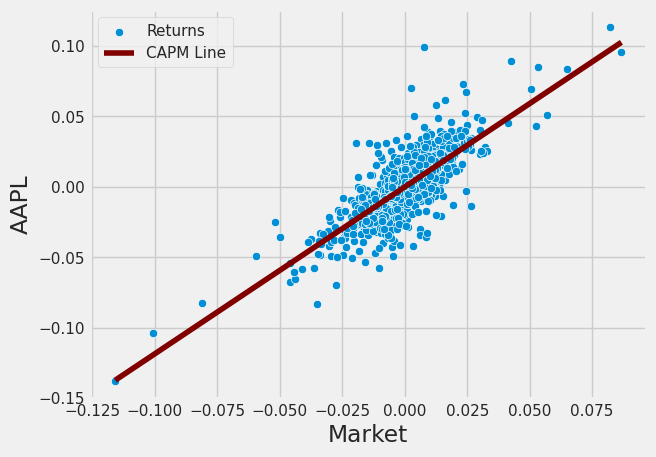

In [57]:
sns.scatterplot(y = 'AAPL', x = 'Market', data = data, label = 'Returns')
sns.lineplot(x = data['Market'], y = alpha + (data['Market']-alpha)*beta_aapl, color = 'maroon', label = 'CAPM Line')

### Convert Daily Stock Market Returns to Annualized Returns (assuming 252 trading days in a year).

In [65]:
rm = data['Market'].mean()*252
rm
cov = data[['Market','AAPL']].cov() *252
cov_aapl_market = cov.iloc[0,1]
cov_aapl_market
market_var = data['Market'].var()*252
market_var

AAPL_beta_annual = cov_aapl_market / market_var
print('The annualized beta will equal the one calculated at daily returns:',AAPL_beta_annual)

rf = 0.025
riskpremium = rm - rf

## CAPM
AAPL_capm_return = rf + AAPL_beta_annual*riskpremium

print(f"The annualized CAPM return of AAPL is {AAPL_capm_return*100:.2f}%")

The annualized beta will equal the one calculated at daily returns: 1.1836818248667782
The annualized CAPM return of AAPL is 13.67%


In [67]:
data

,Market,AAPL,AAL,NFLX,META,ZM
Date,,,,,,
2020-01-02 00:00:00-05:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-03 00:00:00-05:00,-0.007601,-0.009769,-0.050769,-0.011926,-0.005305,-0.021177
2020-01-06 00:00:00-05:00,0.003808,0.007937,-0.012007,0.030014,0.018658,0.044193
2020-01-07 00:00:00-05:00,-0.002815,-0.004714,-0.003667,-0.015242,0.002161,0.022220
2020-01-08 00:00:00-05:00,0.005315,0.015958,0.022522,0.025404,0.010087,0.009000
...,...,...,...,...,...,...
2025-03-06 00:00:00-05:00,-0.017911,-0.001741,-0.061468,-0.089197,-0.044448,-0.001588
2025-03-07 00:00:00-05:00,0.005589,0.015768,-0.016743,-0.016969,-0.003622,0.006602
2025-03-10 00:00:00-04:00,-0.026997,-0.049694,-0.041526,-0.027798,-0.045233,-0.033593
